# Intership Project

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis) 
# pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
# pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
# pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
# pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
# pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib                                             
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
# #-------------------------------------------------------------------------------------------------------------------------------
# from bokeh.layouts import column                                    # To build a grid of plots and widgets
# from bokeh.plotting import Figure                                   # Create a new figure for plotting
# from bokeh.plotting import show                                     # Show the figure result
# from bokeh.plotting import output_notebook                          # Helper that enables ouput in the notebook
# from bokeh.plotting import output_file                              # Generate output saved to a file when show() is called
# from bokeh.models import ColumnDataSource                           # Populate columns by making Ajax calls to REST endpoints
# from bokeh.models import CustomJS                                   # Attaches CustomJS callbacks to property change events
# from bokeh.models import Slider                                     # For custom JS slider widgets
# from bokeh.models import HoverTool                                  # Displays informational tooltips over a glyph
# from bokeh.io import push_notebook                                  # Update Bokeh plots in a Jupyter notebook output
# output_notebook()
# #-------------------------------------------------------------------------------------------------------------------------------
# import plotly
# from plotly import graph_objs as go                                 # Contains an auto-generated hierarchy of Python classes
# from plotly.offline import iplot                                    # Display Figures in offline mode
# #-------------------------------------------------------------------------------------------------------------------------------
# from ipywidgets import interact                                     # Creates UI controls for exploring code and data
# import warnings                                                     # Importing warning to disable runtime warnings
# warnings.filterwarnings("ignore")                                   # Warnings will appear only once
# #---------------------------------------------------------------------------------------------------------------------------------
# Model selection libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
#---------------------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
#------------------------------------------------------------------------------------------------------------------------------
# Data pre-processing and EDA lib.
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------------------------------------------------------------------------
# multicolineartiy test and treatment libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# import xgboost
# from xgboost import XGBRegressor


#Model evaulation libaries 
from sklearn.metrics import r2_score, mean_squared_error

#---------------------------
# Unsupervise ML library
from sklearn.cluster import KMeans
#------------------------------------------------

from collections import OrderedDict

In [2]:
df=pd.read_excel("daily_offers.xlsx")

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
df.isna().mean()*100

id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

In [8]:
def Custome_Summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                "Feature Name" :col,
                "Count": my_df[col].count(),
                "Minimum": my_df[col].min(),
                "Quartile1" : my_df[col].quantile(0.25),
                "Quartile2" : my_df[col].quantile(0.50),
                "Quartile3" : my_df[col].quantile(0.75),
                "Mean": my_df[col].mean(),
                "Variance": round(my_df[col].var()),
                "Standar_Deviation": my_df[col].std(),
                "Skewness" : my_df[col].skew(),
                "Kurtosis" : my_df[col].kurt()
                
                
            })
            result.append(stats)
    result_df = pd.DataFrame(result)
    #Skwness type :
    Skwness_lable  = []
    for i in result_df["Skewness"]:
        if i <=-1 :
            Skwness_lable.append("Highly negative skew ")
        elif -1 < i <= -0.5:
            Skwness_lable.append("Moderately  negative skew ")
    
        elif -0.5 < i < 0:
            Skwness_lable.append(" Fairly  negative skew ")
        elif 0 <= i < 0.5:
            Skwness_lable.append(" Fairly  Postive skew ")
        elif 0.5 <= i < 1:
            Skwness_lable.append(" Moderately Positive  skew ")
        elif i >= 1:
            Skwness_lable.append("Highly Positive  skew ")
        
    result_df["Skewness Comment "] = Skwness_lable 
     
    #Kurto type :
    Kurtosis_lable  = []
    for i in result_df["Kurtosis"]:
        if i >=  1 :
            Kurtosis_lable.append("Lepto  ")
        elif i <= -1:
            Kurtosis_lable.append("Plato  ")
        else :
            Kurtosis_lable.append(" Meso  ")
        
    result_df["Kurtosis Comment "] =  Kurtosis_lable 
    
    
    Outliers_lable = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.50)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            if len(my_df[(my_df[col]< LW)|(my_df[col] > UW)]) > 0:
                Outliers_lable.append("Have outliers")
            else:
                Outliers_lable.append("No Outliers")
    result_df["Outlier Comment"] = Outliers_lable
    
    return  result_df
                
        

In [9]:
Custome_Summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Quartile3,Mean,Variance,Standar_Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,item_date,181672,19950000.00,20200929.0,20201130.0,2.021020e+07,2.020459e+07,20712685,4.551119e+03,-0.526424,52.066985,Moderately negative skew,Lepto,Have outliers
1,customer,181672,12458.00,30196884.0,30205242.0,3.028042e+07,3.051221e+07,592134580877362,2.433382e+07,86.985069,7564.616597,Highly Positive skew,Lepto,Have outliers
2,country,181645,25.00,26.0,30.0,7.800000e+01,4.489302e+01,596,2.440421e+01,0.753595,-1.275599,Moderately Positive skew,Plato,No Outliers
3,application,181649,2.00,10.0,15.0,4.100000e+01,2.561581e+01,315,1.775417e+01,0.724359,-0.545390,Moderately Positive skew,Meso,Have outliers
4,thickness,181672,0.18,0.7,1.5,3.000000e+00,2.564827e+00,43,6.572321e+00,303.446799,114841.598118,Highly Positive skew,Lepto,Have outliers
5,width,181673,1.00,1180.0,1250.0,1.500000e+03,1.295287e+03,68451,2.616318e+02,0.374597,2.214963,Fairly Postive skew,Lepto,Have outliers
6,product_ref,181673,611728.00,611993.0,640665.0,1.332077e+09,4.739679e+08,514820692960042944,7.175101e+08,1.015216,-0.921444,Highly Positive skew,Meso,No Outliers
7,delivery date,181672,20190401.00,20201101.0,20210101.0,2.021040e+07,2.020738e+07,581320525,2.411059e+04,404.953746,169684.791224,Highly Positive skew,Lepto,Have outliers
8,selling_price,181672,-1160.00,669.0,812.0,9.530000e+02,1.918036e+03,110088348419,3.317956e+05,301.387258,90833.352957,Highly Positive skew,Lepto,Have outliers


In [10]:
def replace_outlier(my_df,col,method = 'Quartile',strategy = 'Median'):
    col_data = my_df[col]
    if method == 'Quartile':
        # Using quartile to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.50)
        q3 = col_data.quantile(0.75) 
        IQR = q3 - q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR
        
    elif method == 'Standerd Deviation':
        # using SD method 
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std
        UW = mean + 2*std
    else:
        print("Pass a correct method")
    
    # Printing all the outliers 
    
    outliers = my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df),2)*100
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers ')
        print("\n")
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total no. of outliers in {col} are {len(outliers)} ')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}% ')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    
    # Replacing outliers
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
    else:
        print('Pass a correct strategy')
        
    return my_df

In [11]:
def odt_plots(my_df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25,8)) # one row and 3 colums 
    
    # Descriptive stat box plot 
    sns.boxplot(my_df[col],ax = ax1)
    ax1.set_title(col + 'boxplot')
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Boxplot")
    
    
    # Ploting Histogram with outliers
    sns.distplot(my_df[col],ax = ax2, fit = stats.norm)
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(),color = 'brown')
    ax2.set_title(col + 'Histogram with outliers')
    ax2.set_ylabel("Density")
    ax2.set_xlabel("values")
    
    # Replacing outliers
    df_out = replace_outlier(my_df,col)
    
    
    # Ploting histogram without outliers 
    sns.distplot(df_out[col],ax = ax3,fit = stats.norm)
    ax3.axvline(df_out[col].mean(), color = 'green')
    ax3.axvline(df_out[col].median(),color = 'brown')
    ax3.set_title(col + 'Histogram without outliers')
    ax3.set_ylabel("Density")
    ax3.set_xlabel("values")
    plt.show()
    
  

In [12]:
data1 = df.copy()

data1 = data1.select_dtypes(np.number)

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature item_date has outliers


Total no. of outliers in item_date are 1 


Outlier percentage in item_date is 0.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
52,19950000.0,30162161.0,77.0,4.0,1.1,1300.0,164141591,20210601.0,1046.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


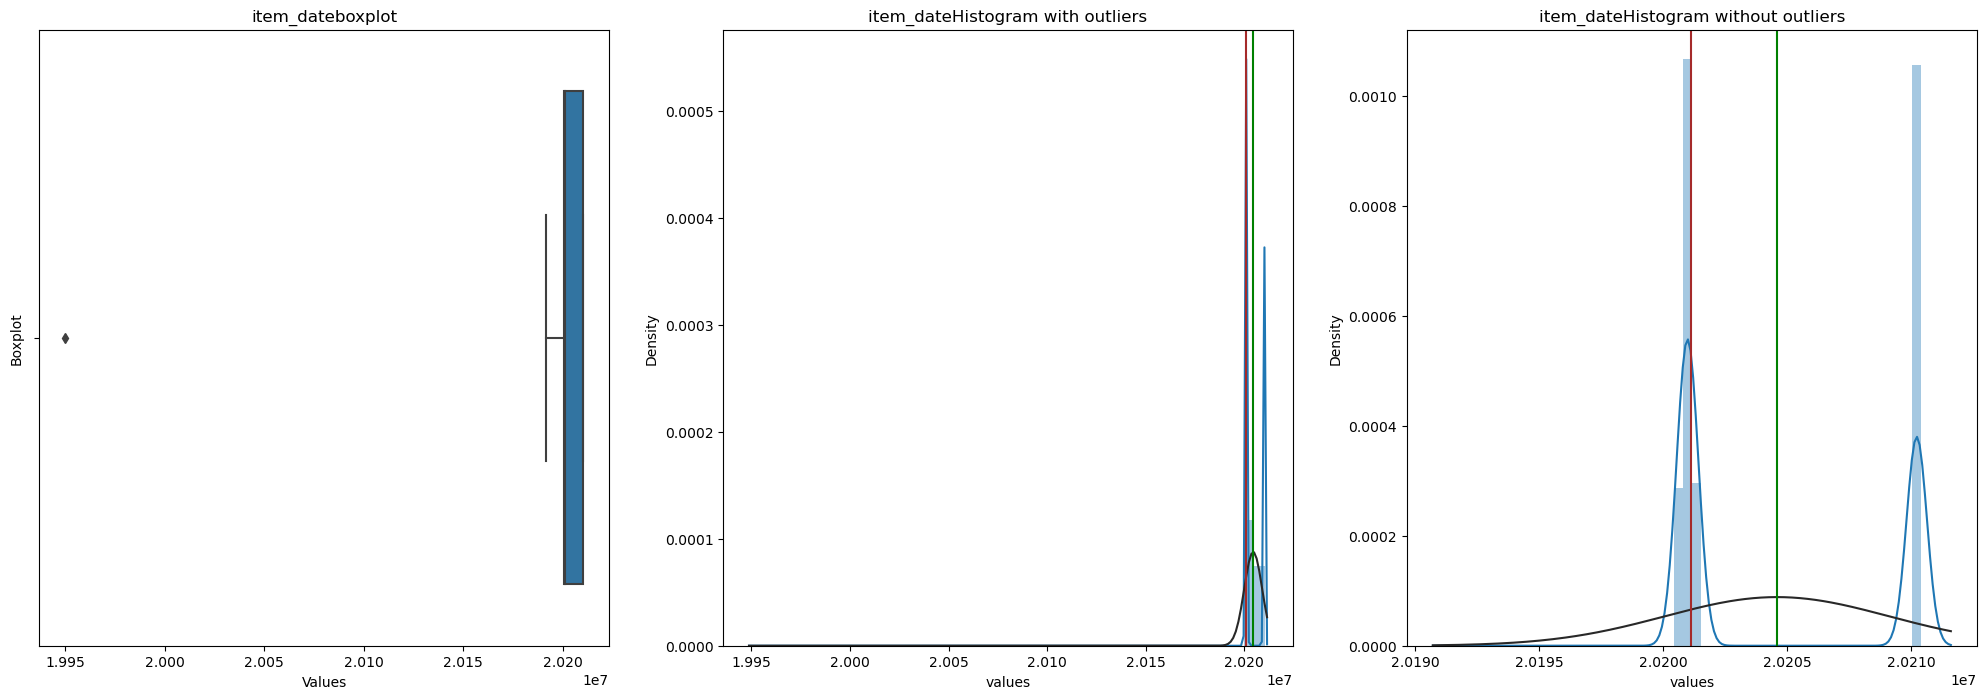

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature customer has outliers


Total no. of outliers in customer are 1631 


Outlier percentage in customer is 1.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
36,20210401.0,30406347.0,32.0,15.0,3.0,1000.0,1671863738,20210701.0,1037.0
407,20210401.0,30407192.0,32.0,20.0,1.0,1013.0,611993,20210701.0,1366.0
409,20210401.0,30407192.0,32.0,20.0,0.5,1005.0,611993,20210701.0,1739.0
411,20210401.0,30407192.0,32.0,20.0,0.5,1005.0,611993,20210701.0,1571.0
413,20210401.0,30407192.0,32.0,20.0,0.6,1175.0,611993,20210701.0,1608.0
...,...,...,...,...,...,...,...,...,...
181335,20200702.0,30406632.0,84.0,29.0,1.0,1250.0,1693867550,20200801.0,680.0
181337,20200702.0,30406632.0,84.0,29.0,1.0,1500.0,1693867550,20200801.0,679.0
181339,20200702.0,30406632.0,84.0,29.0,1.5,1250.0,1693867550,20200801.0,668.0
181341,20200702.0,30406632.0,84.0,29.0,1.5,1500.0,1693867550,20200801.0,668.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


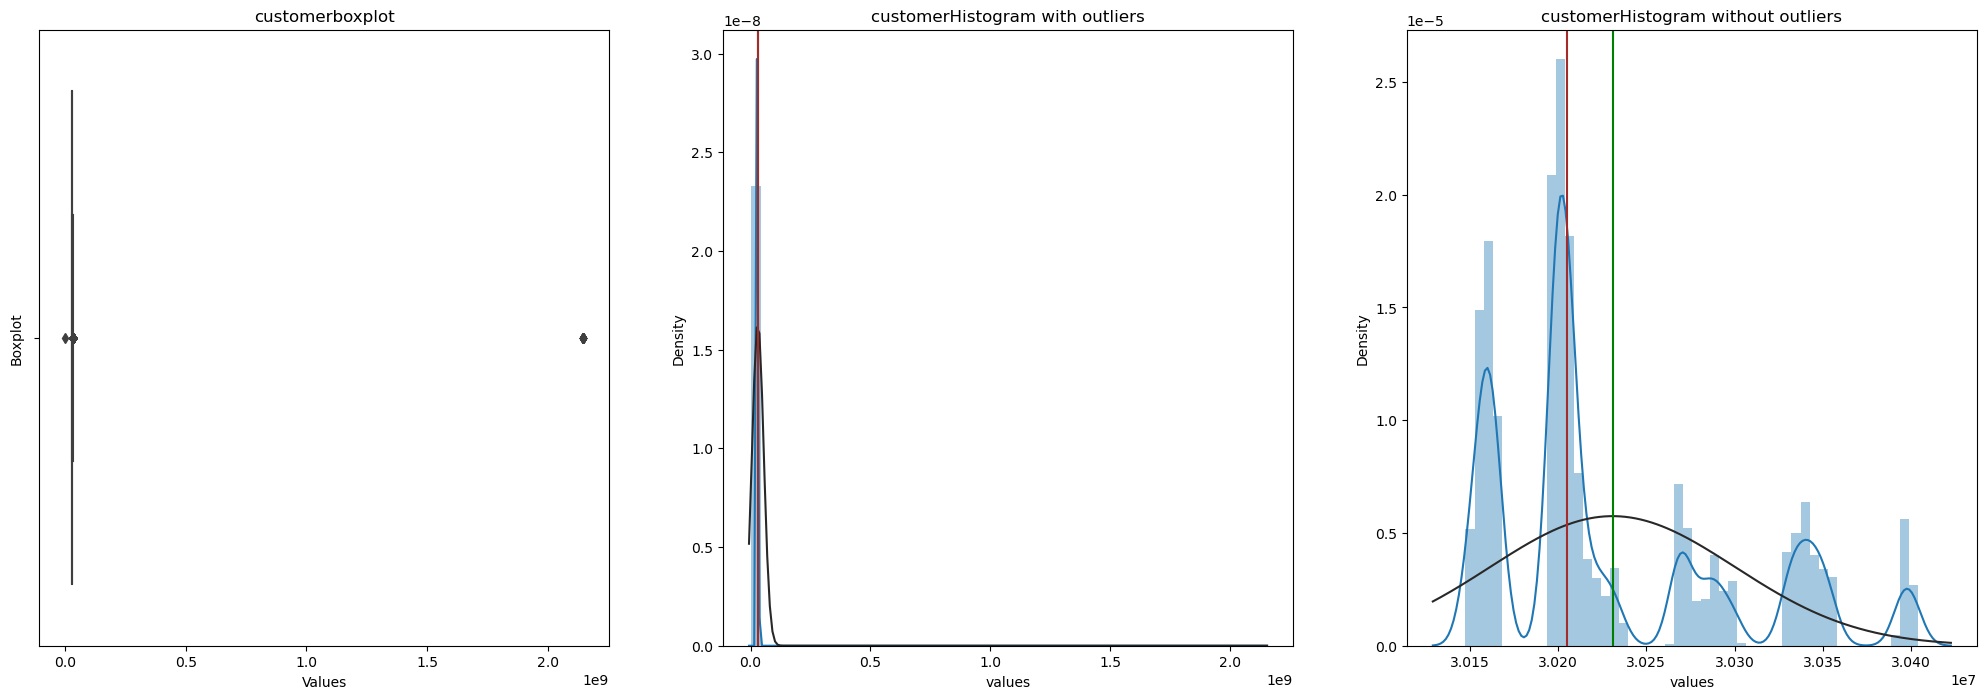

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature country does not have outliers 




C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


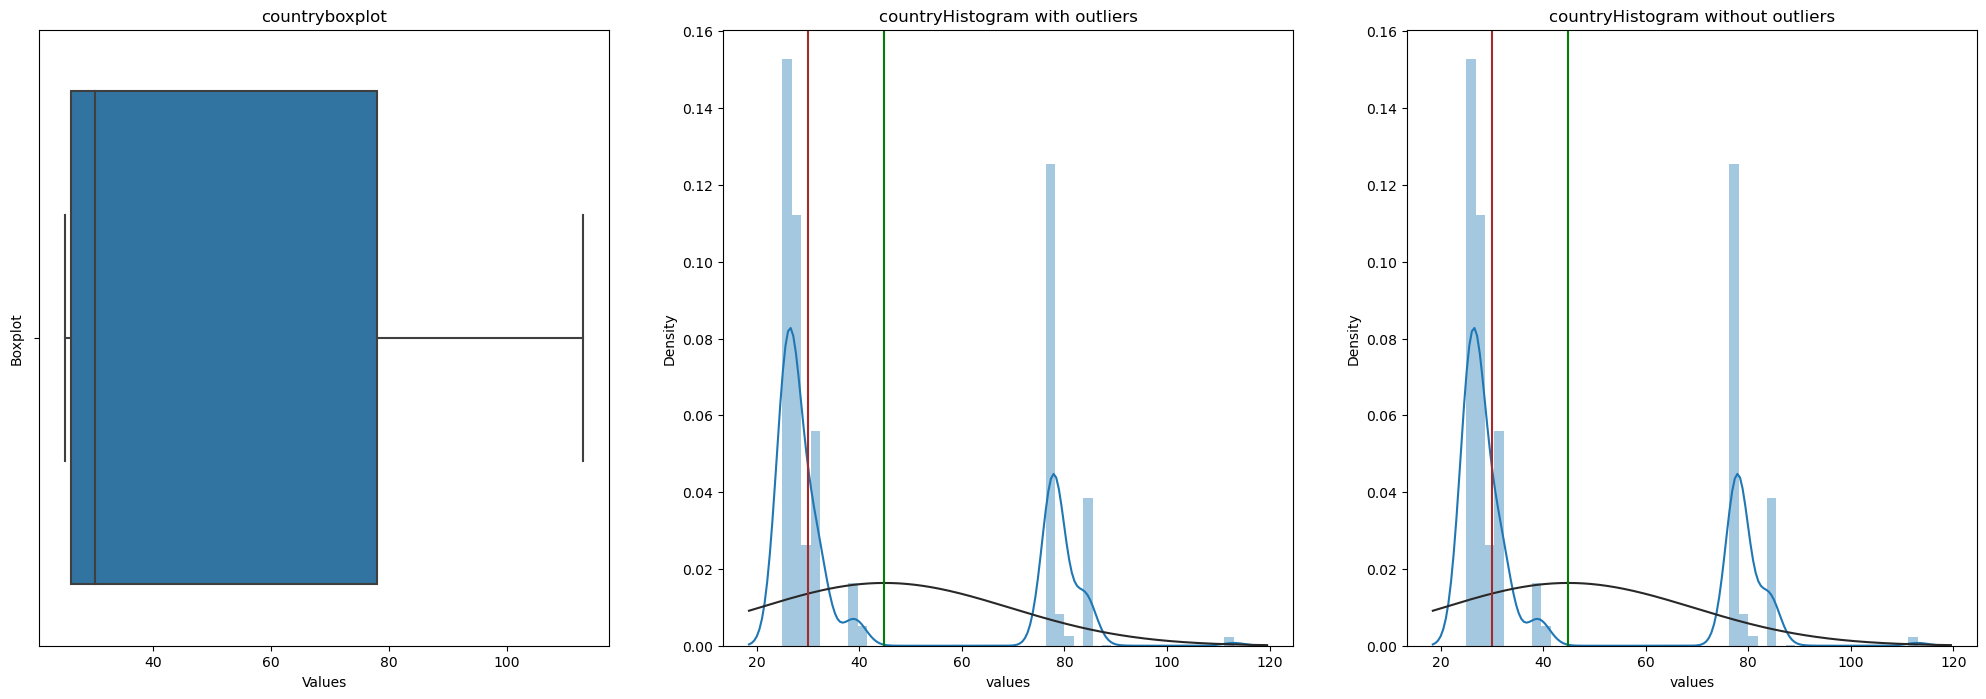

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature application has outliers


Total no. of outliers in application are 146 


Outlier percentage in application is 0.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
3309,20210329.0,30300422.0,26.0,99.0,0.43,700.0,611993,20210701.0,1597.0
3311,20210329.0,30300422.0,26.0,99.0,0.43,710.0,611993,20210701.0,1599.0
3313,20210329.0,30300422.0,26.0,99.0,0.43,740.0,611993,20210701.0,1597.0
3315,20210329.0,30300422.0,26.0,99.0,0.43,800.0,611993,20210701.0,1564.0
8104,20210322.0,30300422.0,26.0,99.0,0.43,710.0,611993,20210701.0,1464.0
...,...,...,...,...,...,...,...,...,...
176137,20200708.0,30401777.0,28.0,99.0,7.00,1500.0,640665,20200901.0,487.0
179527,20200706.0,30300422.0,26.0,99.0,0.43,700.0,611993,20200801.0,1140.0
179531,20200706.0,30300422.0,26.0,99.0,0.43,710.0,611993,20200801.0,1132.0
179535,20200706.0,30300422.0,26.0,99.0,0.43,740.0,611993,20200801.0,1142.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


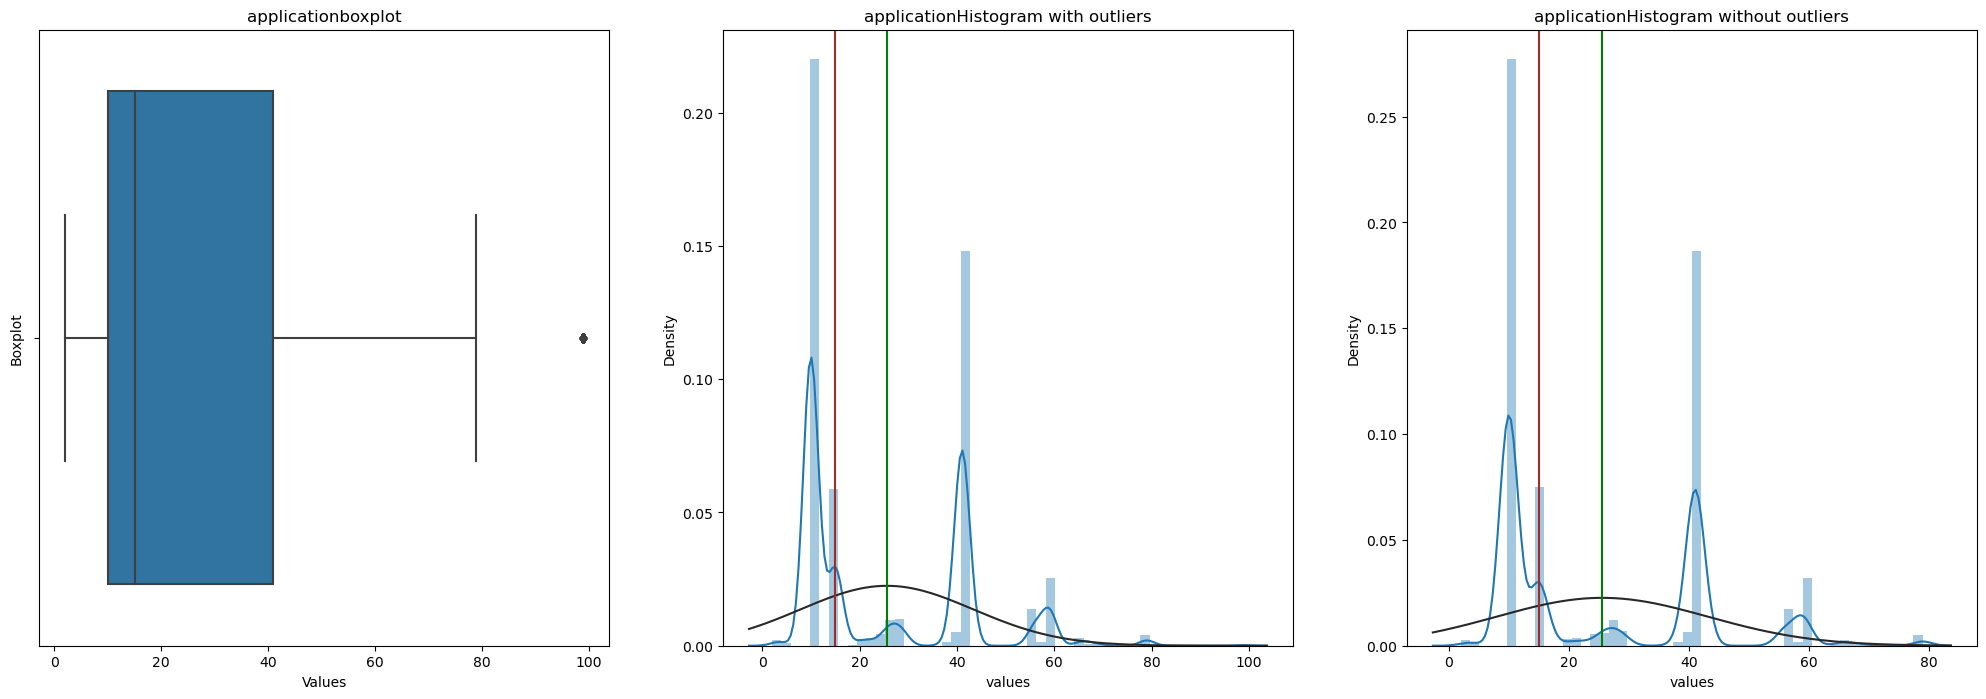

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature thickness has outliers


Total no. of outliers in thickness are 13959 


Outlier percentage in thickness is 8.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
41,20210401.0,30202938.0,25.0,41.0,2500.00,1260.0,1670798778,20210401.0,0.0
93,20210401.0,30394817.0,78.0,10.0,13.00,1640.0,640665,20210601.0,829.0
109,20210401.0,30394817.0,78.0,10.0,7.00,900.0,640665,20210701.0,1038.0
113,20210401.0,30394817.0,78.0,10.0,10.00,900.0,640665,20210701.0,1047.0
117,20210401.0,30394817.0,78.0,10.0,12.00,900.0,640665,20210701.0,1049.0
...,...,...,...,...,...,...,...,...,...
181363,20200702.0,30201370.0,84.0,15.0,8.00,1500.0,640405,20200901.0,581.0
181365,20200702.0,30201370.0,84.0,15.0,10.00,1500.0,640405,20200901.0,583.0
181367,20200702.0,30201370.0,84.0,15.0,12.00,1500.0,1671863738,20200901.0,636.0
181381,20200702.0,30201370.0,84.0,15.0,8.00,1500.0,1671863738,20200901.0,627.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


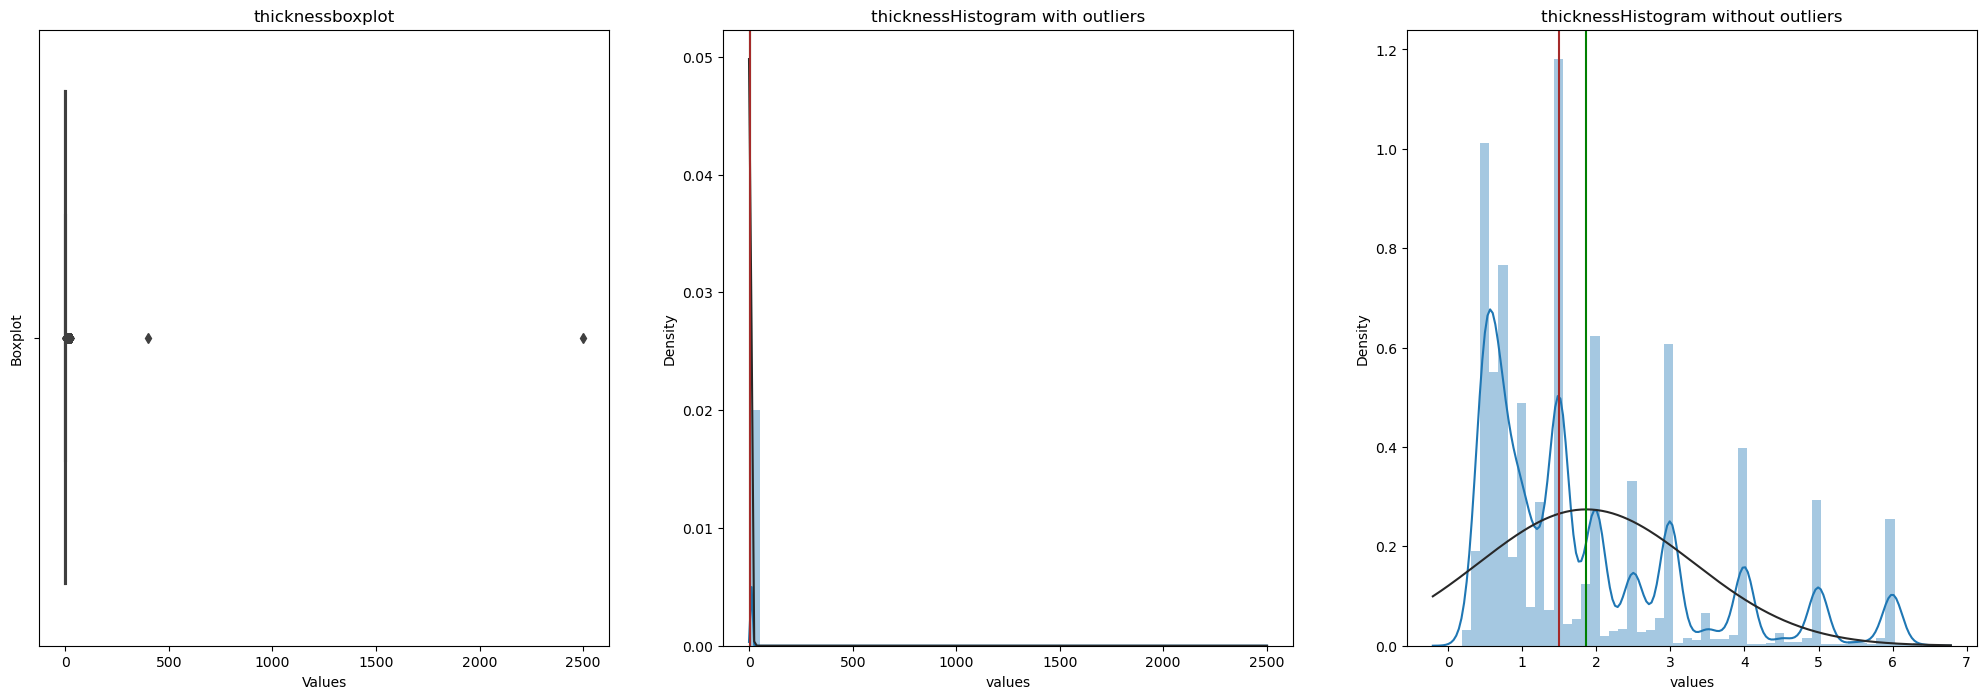

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature width has outliers


Total no. of outliers in width are 10948 


Outlier percentage in width is 6.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
4,20210401.0,30211560.0,28.0,10.0,4.0,2000.0,640665,20210301.0,577.0
328,20210401.0,30156308.0,28.0,10.0,2.0,2000.0,628377,20210901.0,1130.0
360,20210401.0,30332693.0,77.0,15.0,1.5,2000.0,640405,20210501.0,921.0
526,20210401.0,30330352.0,78.0,10.0,2.4,1.0,1670798778,20210701.0,956.0
728,20210331.0,30197899.0,26.0,29.0,0.6,656.0,628377,20210101.0,852.0
...,...,...,...,...,...,...,...,...,...
181349,20200702.0,30201370.0,84.0,15.0,4.0,2020.0,640405,20200901.0,608.0
181359,20200702.0,30201370.0,84.0,15.0,5.0,2020.0,640405,20200901.0,613.0
181361,20200702.0,30201370.0,84.0,15.0,6.0,2020.0,640405,20200901.0,607.0
181433,20200702.0,30227718.0,25.0,15.0,6.0,2000.0,640665,20200801.0,552.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


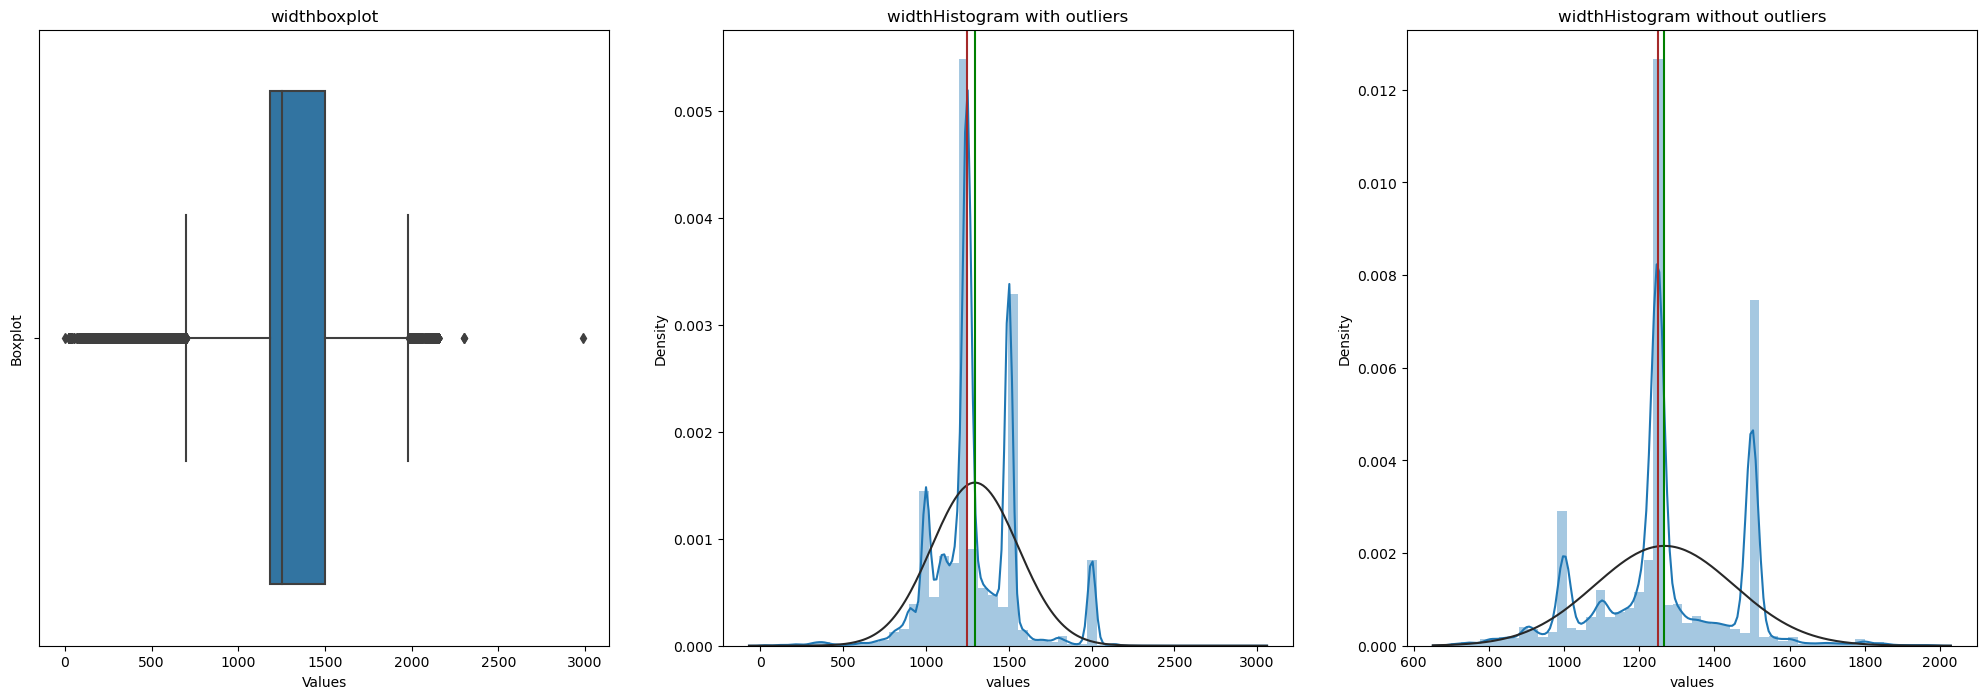

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature product_ref does not have outliers 




C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


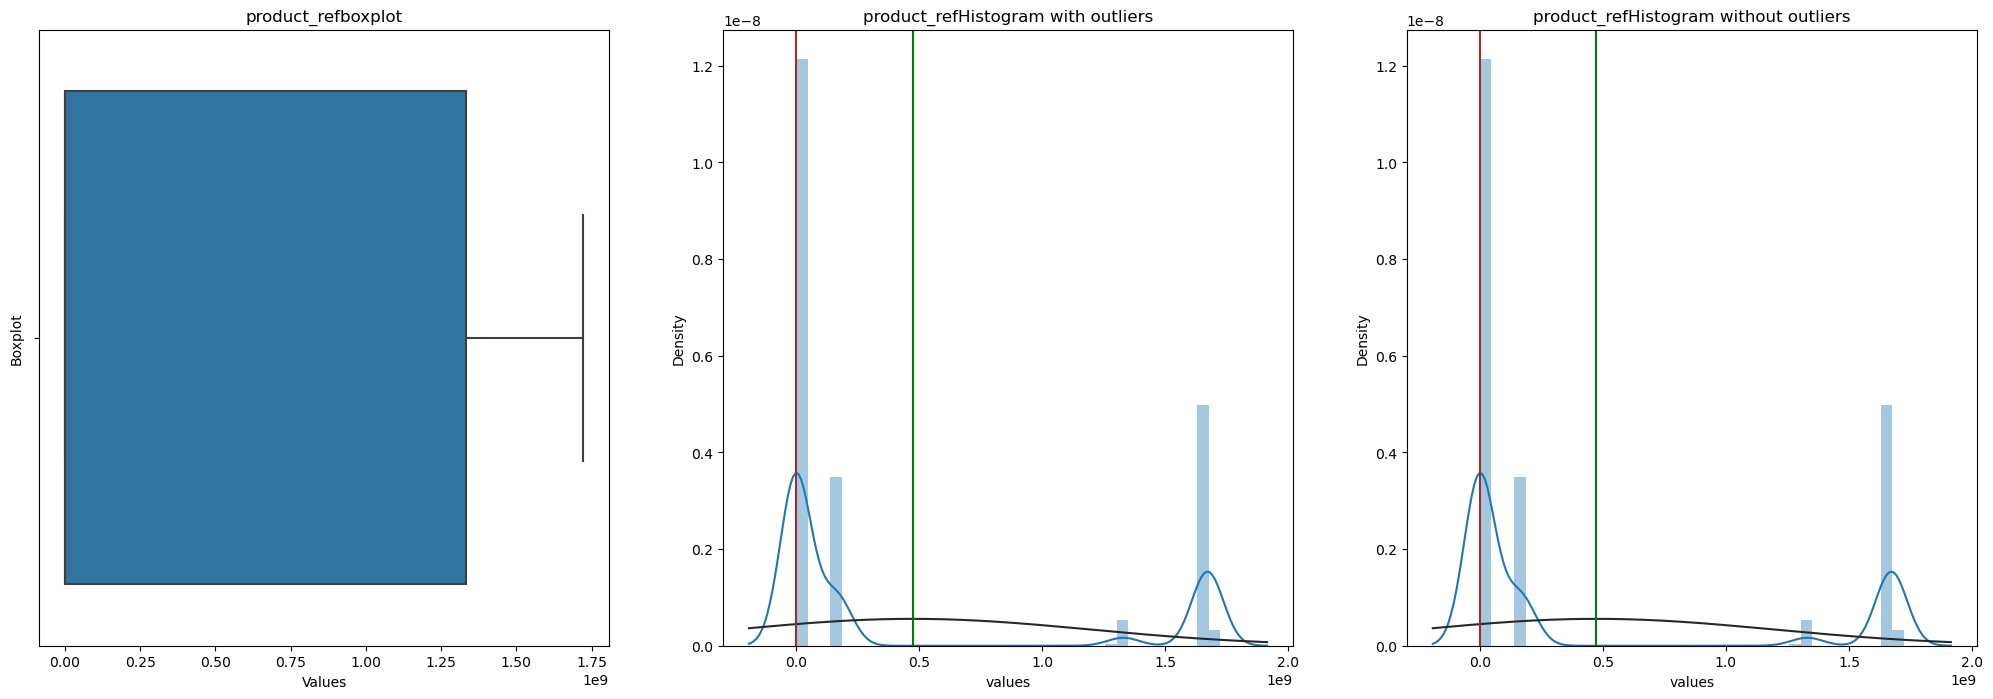

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature delivery date has outliers


Total no. of outliers in delivery date are 1 


Outlier percentage in delivery date is 0.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
58,20210401.0,30271717.0,28.0,10.0,0.6,1250.0,611993,30310101.0,1266.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


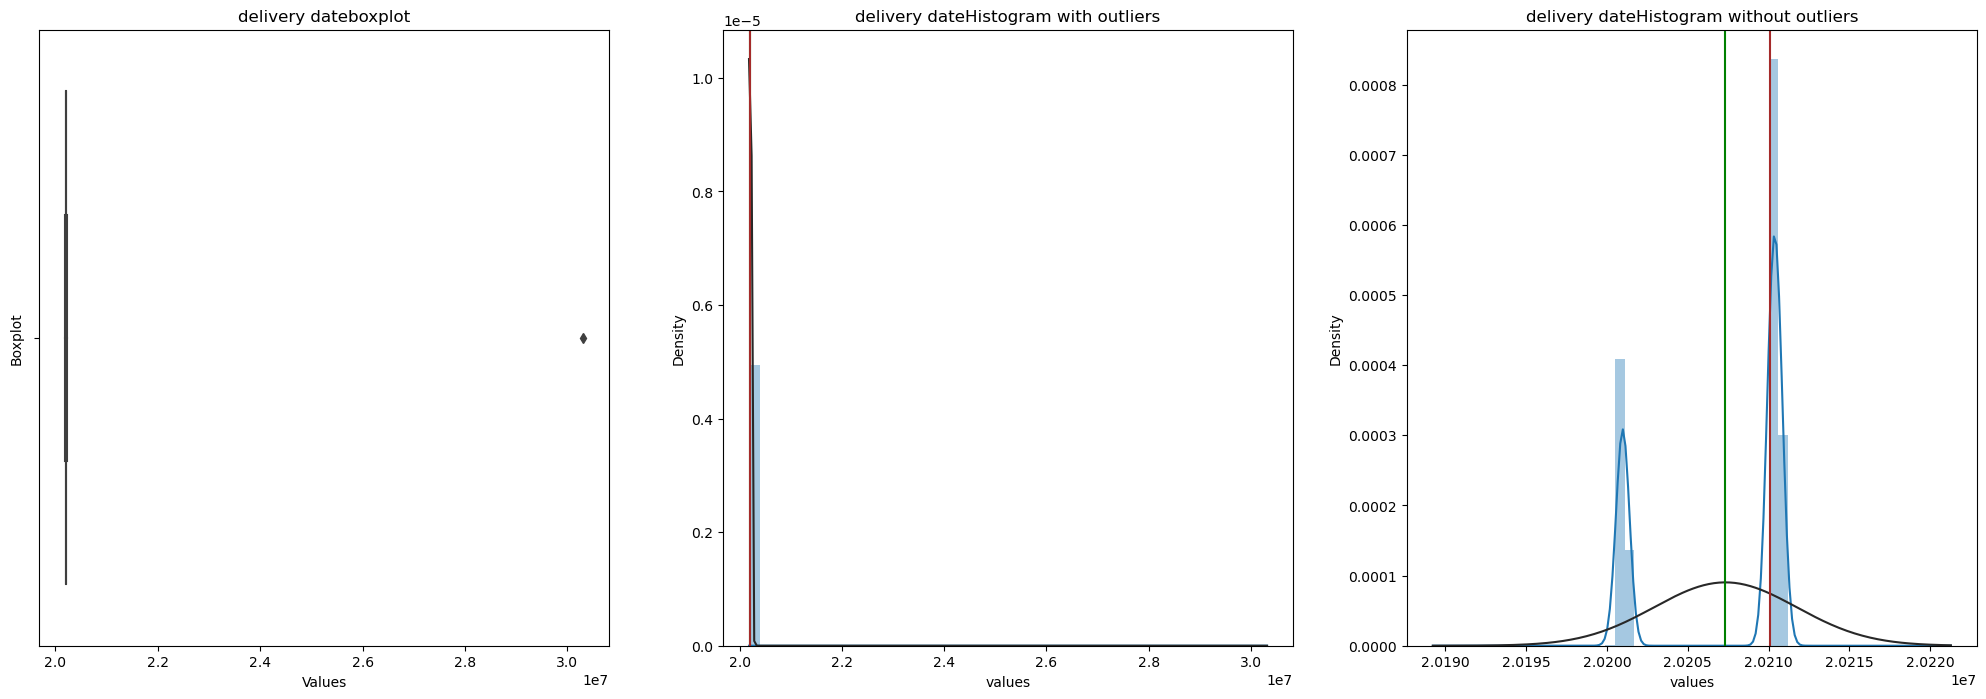

C:\Users\MGM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature selling_price has outliers


Total no. of outliers in selling_price are 4877 


Outlier percentage in selling_price is 3.0% 




,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
6,20210401.0,30209509.0,30.0,41.0,0.380,1125.0,611993,20210701.0,18.0
10,20210401.0,30209509.0,30.0,41.0,0.380,1125.0,611993,20210701.0,17.0
28,20210401.0,30153510.0,30.0,41.0,0.595,1207.0,611993,20210401.0,-1160.0
41,20210401.0,30202938.0,25.0,41.0,1.500,1260.0,1670798778,20210401.0,0.0
102,20210401.0,30271717.0,28.0,10.0,1.000,1000.0,611993,20210701.0,1386.0
...,...,...,...,...,...,...,...,...,...
180293,20200702.0,30268656.0,79.0,15.0,2.000,1500.0,164141591,20201001.0,21.0
180297,20200702.0,30268656.0,79.0,15.0,1.500,1500.0,164141591,20201001.0,11.0
180301,20200702.0,30268656.0,79.0,15.0,2.000,1500.0,164141591,20201001.0,14.0
180305,20200702.0,30268656.0,79.0,15.0,3.000,1500.0,164141591,20201001.0,19.0


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


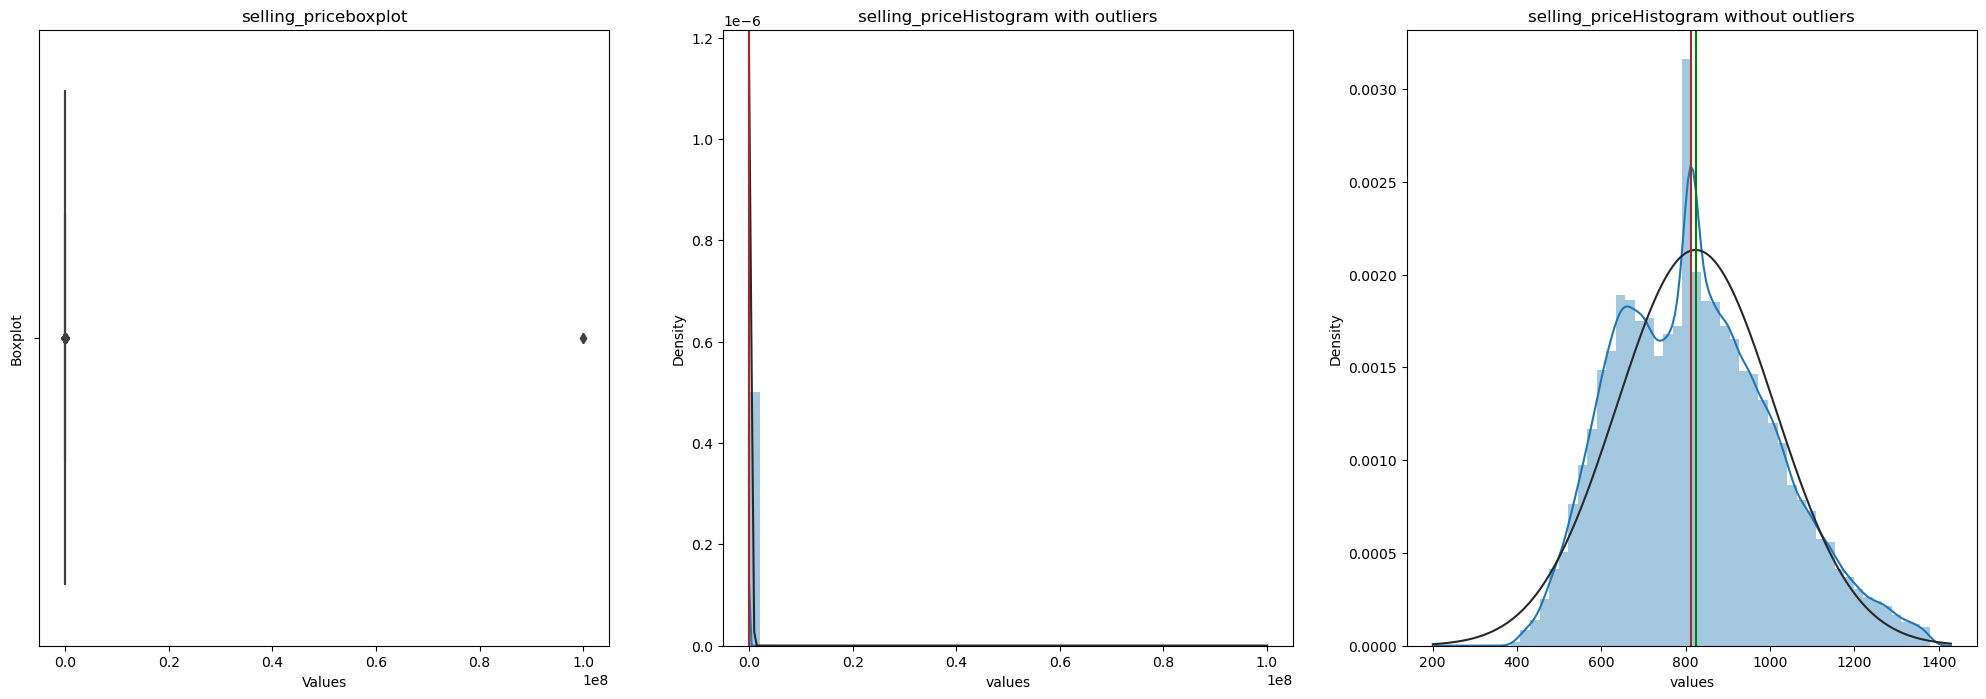

In [13]:
for col in data1:
    odt_plots(data1,col)

In [14]:
# Missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [16]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [17]:
df['item_date'].mean()

20204588.226947464

In [18]:
df['item_date'].median()

20201130.0

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')

In [20]:
df['item_date']=imputer.fit_transform(df[['item_date']])
df['thickness']=imputer.fit_transform(df[['thickness']])
df['delivery date']=imputer.fit_transform(df[['delivery date']])
df['selling_price']=imputer.fit_transform(df[['selling_price']])
df['application']=imputer.fit_transform(df[['application']])
df['country']=imputer.fit_transform(df[['country']])
df['customer']=imputer.fit_transform(df[[ 'customer']])

In [21]:
imputer_obj=SimpleImputer(strategy='most_frequent')
df['status']=imputer_obj.fit_transform(df[['status']])

In [22]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [23]:
df.item_date.value_counts()

20201202.0    2779
20210304.0    2088
20201124.0    1991
20210115.0    1928
20200929.0    1870
              ... 
20210227.0       1
20200906.0       1
20200905.0       1
20200829.0       1
20210313.0       1
Name: item_date, Length: 253, dtype: int64

In [24]:
df['quantity tons'].value_counts()

54.151139     1
75.110726     1
32.431644     1
31.925345     1
132.311385    1
             ..
13.869590     1
2.738536      1
233.264013    1
11.940179     1
406.686538    1
Name: quantity tons, Length: 181673, dtype: int64

In [25]:
df.drop(labels=['id','material_ref'],axis=1,inplace=True)

In [26]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


Encoding Technics


C:\Users\MGM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='status', ylabel='Density'>

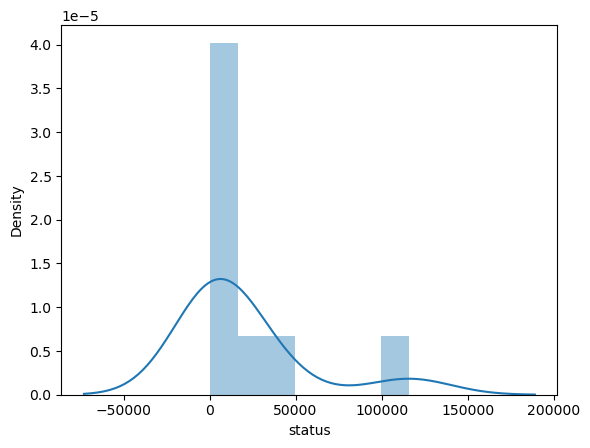

In [31]:
sns.distplot(df['status'].value_counts())

In [29]:
df['status'].value_counts()

Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [32]:
df['item type'].value_counts()

W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64